<a href="https://colab.research.google.com/github/CaptainJimbo/MyPortfolio/blob/main/facesfacesfacesNOTcomplete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table align="center">
  <td align="center"><a target="_blank" href="https://sayhelloto.my.canva.site/dimitris-kogias">
        <img src="https://static.wikia.nocookie.net/bravestarr/images/6/6d/Lucas_Conway.png/revision/latest?cb=20211111224054" style="padding-bottom:5px;" height="70px" />
      Visit my Website</a></td>
  <td align="center"><a target="_blank" href="https://colab.research.google.com/github//CaptainJimbo/MyPortfolio/blob/main/facesfacesfacesNOTcomplete.ipynb">
        <img src="https://i.ibb.co/2P3SLwK/colab.png"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
  <td align="center"><a target="_blank" href="https://github.com/CaptainJimbo/MyPortfolio/blob/main/facesfacesfacesNOTcomplete.ipynb">
        <img src="https://i.ibb.co/xfJbPmL/github.png"  height="70px" style="padding-bottom:5px;"  />View Source on GitHub</a></td>
</table>


<table align="left">
  <td align="left">
  <a target="_blank" href="https://sayhelloto.my.canva.site/dimitris-kogias" style="text-decoration: none; display: flex; align-items: center; color: white; background-color: purple; padding: 10px; border-radius: 5px;">
      <img src="https://static.wikia.nocookie.net/bravestarr/images/6/6d/Lucas_Conway.png/revision/latest?cb=20211111224054" width="40px" height="40px" style="border-radius: 50%; margin-right: 10px;" />
      <span>Visit my Website</span>
    </a>
  </td>
</table>



<table align="left">
  <td align="left"><a target="_blank" href="https://github.com/CaptainJimbo/MyPortfolio/blob/main/facesfacesfacesNOTcomplete.ipynb" style="text-decoration: none; display: flex; align-items: center; color: black; background-color: lightgray; padding: 10px; [κείμενο συνδέσμου](https://)border-radius: 5px;">
        <img src="https://i.ibb.co/xfJbPmL/github.png"  width="40px" height="40px" style="border-radius: 50%; margin-right: 10px;"   />View it on GitHub</a></td>
</table>

colab
<table align="left">
  <td align="left"><a target="_blank" href="https://colab.research.google.com/github/CaptainJimbo/MyPortfolio/blob/main/facesfacesfacesNOTcomplete.ipynb" style="text-decoration: none; display: flex; align-items: center; color: black; background-color: lightgray; padding: 10px; border-radius: 5px;">
        <img src=""  width="40px" height="40px" style="border-radius: 50%; margin-right: 10px;"   />View it on Colab</a></td>
</table>


We will build a semi-supervised variational autoencoder (SS-VAE) that learns the latent distribution of features underlying face image datasets in order to uncover hidden biases. (final goal)



In [1]:
import tensorflow as tf
import IPython
import functools
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm


!pip install ipywidgets
import ipywidgets as widgets
from IPython.display import display, clear_output

!pip install mitdeeplearning
import mitdeeplearning as mdl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mitdeeplearning: filename=mitdeeplearning-0.3.0-py3-none-any.whl size=2117302 sha256=38726c97324e43369c12ad17acce69fe1e6173703c6646f74293b0088a68af75
  Stored in directory: /root/.cache/pip/wheels/9c/9f/b5/0e31f83bc60a83625e37429f923934e26802d0d68cf3ef3216
Successfully built mitdeeplearning


In [2]:
# Training data is both from CelebA and ImageNet
# The function tf.keras.utils.get_file() is a utility provided by TensorFlow's Keras API to download a file from a URL if it isn't
# already in the cache. This can be useful for fetching datasets, model weights, or any other file necessary for an experiment.
# The function will look for the file in the cache directory first (by default, ~/.keras/), and if it doesn't find it, it will download it.

path_to_training_data = tf.keras.utils.get_file('train_face.h5', 'https://www.dropbox.com/s/hlz8atheyozp1yx/train_face.h5?dl=1')
# Instantiate a TrainingDatasetLoader using the downloaded dataset
loader = mdl.lab2.TrainingDatasetLoader(path_to_training_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1263889489/1263889489 [==============================] - 20s 0us/step
Opening /root/.keras/datasets/train_face.h5
Loading data into memory...


In [3]:
number_of_training_examples = loader.get_train_size()
print(f'Size of training data is {number_of_training_examples} samples')
(images, labels) = loader.get_batch(1000)
print(f'Picked a batch of {len(images)} faces and {len(images)} non-faces samples.')

Size of training data is 109914 samples
Picked a batch of 1000 faces and 1000 non-faces samples.


In [4]:
face_images = images[np.where(labels==1)[0]]
not_face_images = images[np.where(labels==0)[0]]

In [5]:
def show(images,n=16):
    length = int(np.sqrt(n))
    plt.figure(figsize=(round(length*3/2),round(length*3/2)))
    random_inds = np.random.choice(len(images),n)
    for i in range(length**2):
        plt.subplot(length,length,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        image_ind = random_inds[i]
        plt.imshow(images[image_ind])#, cmap=plt.cm.binary)
    plt.show()

def plot_images(idx_face, idx_not_face):
    plt.figure(figsize=(4,2))

    plt.subplot(1, 2, 1)
    plt.imshow(face_images[idx_face])
    plt.title("Face"); plt.grid(False); plt.xticks([]); plt.yticks([])

    plt.subplot(1, 2, 2)
    plt.imshow(not_face_images[idx_not_face])
    plt.title("Not Face"); plt.grid(False); plt.xticks([]); plt.yticks([])
    plt.show()

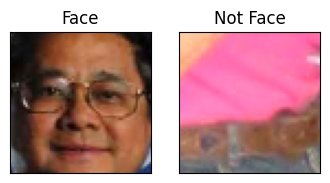

In [6]:
print('Let\'s scroll through some samples')
face_slider = widgets.IntSlider(min=0, max=50, step=1, value=2)
not_face_slider = widgets.IntSlider(min=0, max=50, step=1, value=8)
widgets.interactive(plot_images, idx_face=face_slider, idx_not_face=not_face_slider)

Let's view some more. This will show something else for the dataset...

For example 100 images of faces. These images are used as positive examples. Keep in mind that already in this sample that is randomly picked the dark skinned
males and females are significantly less, which incorporates a bias (the classifier will identify less accurately dark skinned males and females). The classif
ier (if it is a standard CNN) will be affected by this imbalance.



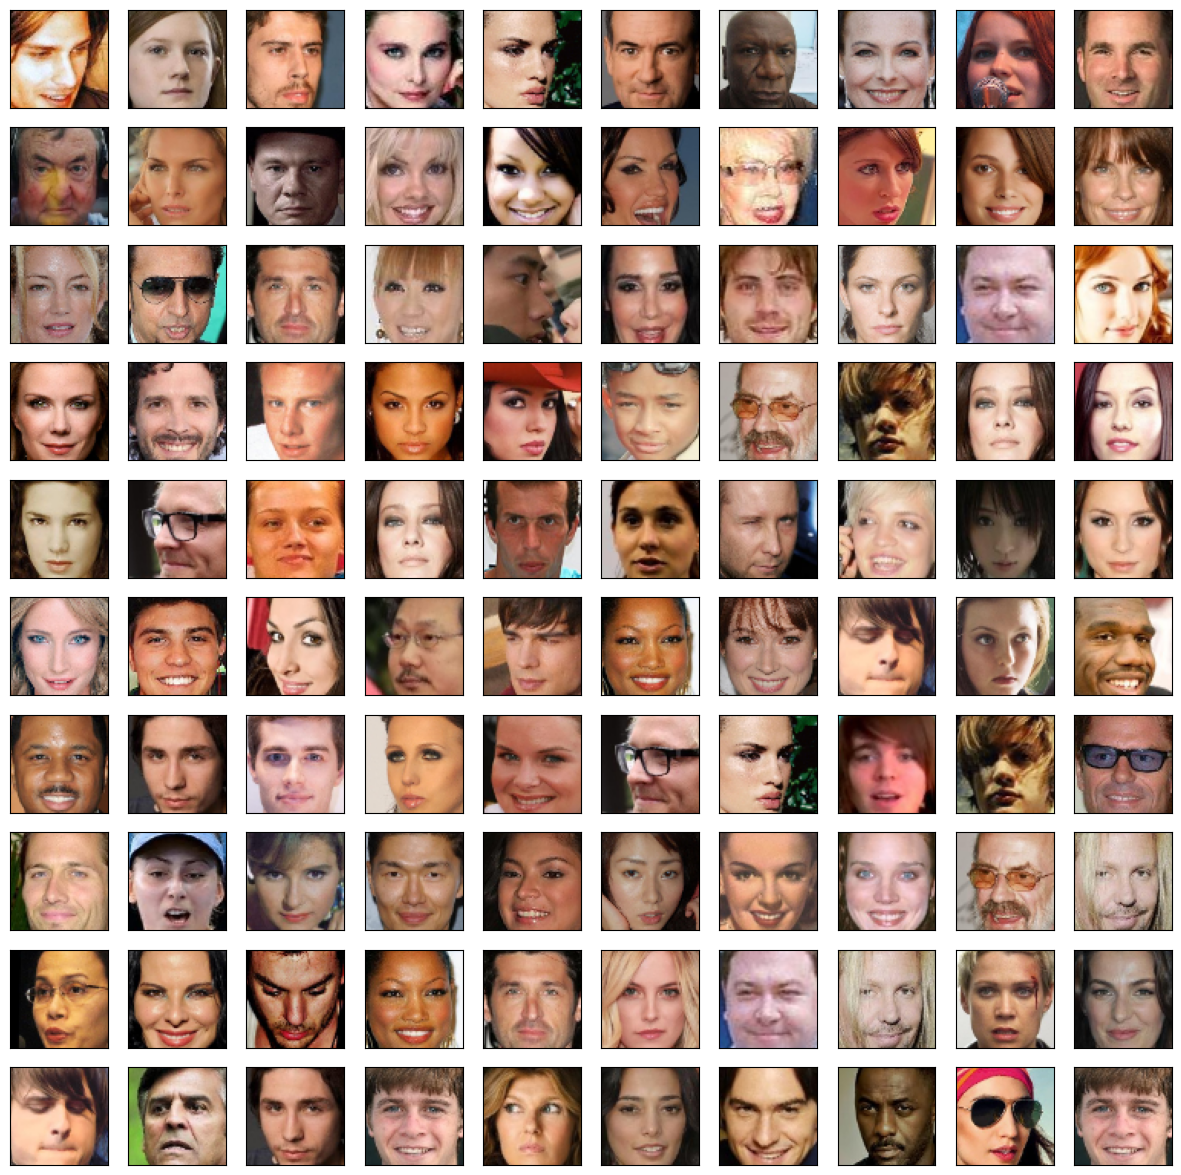

In [7]:
print('Let\'s view some more. This will show something else for the dataset...')

print('\nFor example 100 images of faces. These images are used as positive examples. Keep \
in mind that already in this sample that is randomly picked the dark skinned\nmales and females \
are significantly less, which incorporates a bias (the classifier will identify less accurately dark skinned \
males and females). The classif\nier (if it is a standard CNN) will be affected by this imbalance.\n')
show(face_images,100)


Here are 16 images of not faces. These images are used as negative examples.


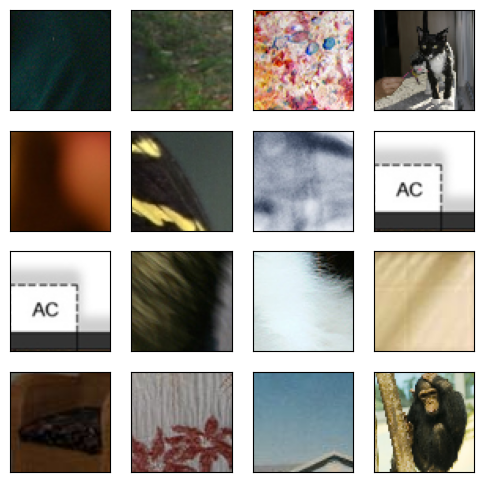

In [8]:
print('Here are 16 images of not faces. These images are used as negative examples.')
show(not_face_images,16)

We will set up and train a basic CNN to identify if a specific image depicts a face or doesn't. After training, we'll assess its performance. The architecture of a CNN follows a typical pattern, with several convolutional layers with batch normalization followed by two fully connected layers to flatten the convolution output and generate a class prediction.

In [9]:
def standard_CNN(n_outputs=1):
    Conv2D = functools.partial(tf.keras.layers.Conv2D, padding='same', activation='relu')
    BatchNormalization = tf.keras.layers.BatchNormalization
    Flatten = tf.keras.layers.Flatten
    Dense = functools.partial(tf.keras.layers.Dense, activation='relu')

    model = tf.keras.Sequential([
    #1st layer
    Conv2D(filters=1*12, kernel_size=5,  strides=2),
    BatchNormalization(),
    #2nd layer
    Conv2D(filters=2*12, kernel_size=5,  strides=2),
    BatchNormalization(),
    #3rd layer
    Conv2D(filters=4*12, kernel_size=3,  strides=2),
    BatchNormalization(),
    #4th layer
    Conv2D(filters=6*12, kernel_size=3,  strides=2),
    BatchNormalization(),
    #5th layer
    Flatten(),
    #6th layer
    Dense(512),
    #7th layer
    Dense(n_outputs, activation=None),
    ])

    return model

standard_classifier = standard_CNN()

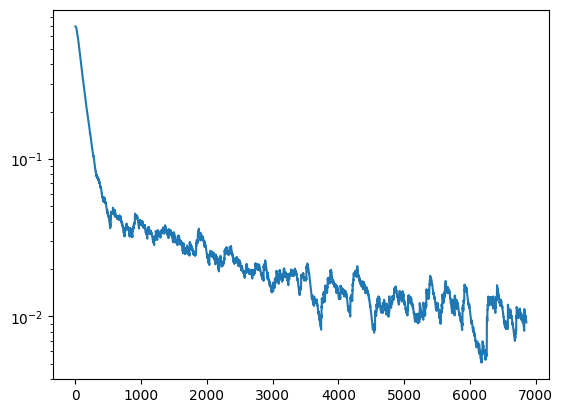

100%|██████████| 3434/3434 [05:02<00:00, 11.34it/s]


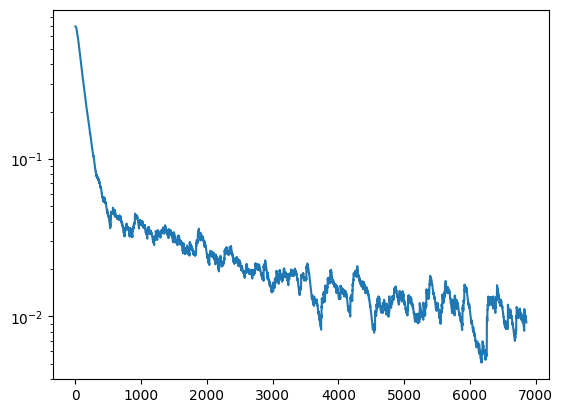

In [10]:
batch_size = 32
num_epochs = 2
learning_rate = 5e-4

optimizer = tf.keras.optimizers.Adam(learning_rate) # define our optimizer
loss_history = mdl.util.LossHistory(smoothing_factor=0.99) # to record loss evolution
plotter = mdl.util.PeriodicPlotter(sec=2, scale='semilogy')
if hasattr(tqdm, '_instances'): tqdm._instances.clear() # clear if it exists

@tf.function
def standard_train_step(x, y):
  with tf.GradientTape() as tape:
    # feed the images into the model
    logits = standard_classifier(x)
    # Compute the loss
    loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=logits)

  # Backpropagation
  grads = tape.gradient(loss, standard_classifier.trainable_variables)
  optimizer.apply_gradients(zip(grads, standard_classifier.trainable_variables))
  return loss

# The training loop!
for epoch in range(num_epochs):
  for idx in tqdm(range(loader.get_train_size()//batch_size)):
    # Grab a batch of training data and propagate through the network
    x, y = loader.get_batch(batch_size)
    loss = standard_train_step(x, y)

    # Record the loss and plot the evolution of the loss as a function of training
    loss_history.append(loss.numpy().mean())
    plotter.plot(loss_history.get())

In [11]:
(batch_x, batch_y) = loader.get_batch(5000)
y_pred_standard = tf.round(tf.nn.sigmoid(standard_classifier.predict(batch_x)))
# tf.equal() compares
# tf.cast() transform to type
# tf.reduce_mean() find the average
acc_standard = tf.reduce_mean(tf.cast(tf.equal(batch_y, y_pred_standard), tf.float32))

print("Standard CNN accuracy on (potentially biased) training set: {:.4f}".format(acc_standard.numpy()))

157/157 [==============================] - 4s 26ms/step
Standard CNN accuracy on (potentially biased) training set: 0.9972


<justify>
This is a good (excellent) performance, however the nn <img src="https://www.thoughtco.com/thmb/DlzsYR0whBb3taEl45YTviOZtxM=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/GettyImages-11410491702-07f03ccd0eb54d36a9b62212cd2f55a1.jpg"  width="400" align='right' />algorithm distinguishes faces from non faces by finding latent characteristics (features) inside the pictures that we can't recognise at first glance. Since we can not perceive such characteristics and we are the ones who picked the sample, it is very probable that such characteristics are not equally stratified among the sample. Therefore, the algorithm can have biases based on training data.
Allegorically, it is like <b>Plato's Cave</b>, where the prisoners can only recognise the shapes of objects while a freed man recognises more quintessential properties. In that case a prisoner and freed man would probably have different ways of recognizing objects and divide them in different groups. However, it's important to remember that just because a neural network perceives more characteristics doesn't mean it's infallible.
</justify>


<h1> SOLUTIONS </h1>


<justify>
First approach

A naive first approach (most usually done) would be to create different subclasses (i.e., light-skinned females, males with hats, etc.) within the training data, and then evaluate classifier performance with respect to these clustered groups.

But there are two big problems with this. First, labeling lots of data that way takes a lot of time and effort. Second, we might miss out on some biases (like race, hats, glasses, etc.) because we didn’t think of them when labeling. Remember, we are the prisoners and the algorithm is the freed men!

Imbalances in the training data can result in unwanted algorithmic bias. For example, the majority of faces in the training dataset are those of light-skinned females. As a result, a classifier trained that will be better suited at recognizing and classifying faces with features similar to these, and will thus be biased.

BUT there is a way to "learn" the distribution of data features in an unbiased, unsupervised manner, without the need for any annotation and grouping? We can use VAEs!
</justify>
<center><img src="https://i.imgflip.com/7vsslk.jpg
"  width="500"/>

<div style="text-align: center"> <h1> The concept of VAEs</h1></div>

<center> <img src="https://i.ibb.co/3s4S6Gc/vae.jpg
"  width="700"/>
</center>

<justify>
The equation for the latent loss is provided by:

$$L_{KL}(\mu, \sigma) = \frac{1}{2}\sum_{j=0}^{k-1} (\sigma_j + \mu_j^2 - 1 - \log{\sigma_j})$$

The equation for the reconstruction loss is provided by:

$$L_{x}{(x,\hat{x})} = ||x-\hat{x}||_1$$

Thus for the VAE loss we have:

$$L_{VAE} = c\cdot L_{KL} + L_{x}{(x,\hat{x})}$$

where $c$ is a weighting coefficient used for regularization. Now we're ready to define our VAE loss function:
</justify>

In [12]:
## Defining the VAE loss function ###
def vae_loss_function(x, x_recon, mu, logsigma, kl_weight=0.0005):

  latent_loss = 0.5 * tf.reduce_sum(tf.exp(logsigma) + tf.square(mu) - 1.0 - logsigma, axis=1)
  reconstruction_loss = tf.reduce_mean(tf.abs(x-x_recon), axis=(1,2,3))
  vae_loss = kl_weight * latent_loss + reconstruction_loss

  return vae_loss


VAEs use a "reparameterization  trick" for sampling learned latent variables. The VAE encoder generates a vector of means and a vector of standard deviations that are constrained to roughly follow Gaussian distributions. We then sample a noise value $\epsilon$ from a Gaussian distribution, and then scale it by the standard deviation and add back the mean to output the result as our sampled latent vector. Formalizing this for a latent variable $z$ where we sample $\epsilon \sim N(0,(I))$ we have:

$$z = \mu + e^{\left(\frac{1}{2} \cdot \log{\Sigma}\right)}\circ \epsilon$$

where $\mu$ is the mean and $\Sigma$ is the covariance matrix. This is useful because it will let us neatly define the loss function for the VAE, generate randomly sampled latent variables, achieve improved network generalization, **and** make our complete VAE network differentiable so that it can be trained via backpropagation. Quite powerful!

Let's define a function to implement the VAE sampling operation:

In [13]:
### VAE Sampling ###

"""Sample latent variables via reparameterization with an isotropic unit Gaussian.
# Arguments
    z_mean, z_logsigma (tensor): mean and log of standard deviation of latent distribution (Q(z|X))
# Returns
    z (tensor): sampled latent vector
"""
def sampling(z_mean, z_logsigma):
  # random.normal is mean=0 and std=1.0
  batch, latent_dim = z_mean.shape
  epsilon = tf.random.normal(shape=(batch, latent_dim))

  z = z_mean + tf.math.exp(0.5 * z_logsigma) * epsilon

  return z

## Semi-supervised variational autoencoder (SS-VAE)

## Semi-supervised variational autoencoder (SS-VAE)

A VAE that has a supervised component in order to both output a classification decision for the facial detection task and analyze where the biases in our model may be resulting from. While previous works like that of  Buolamwini and Gebru have focused on skin tone and gender as two categories where facial detection models may be experiencing bias, there may be other unlabeled features that also are biased, resulting in poorer classification performance. We will build our semi-supervised VAE (SS-VAE) to learn these underlying latent features.

A general schematic of the SS-VAE architecture is shown here.

<center><img src="https://raw.githubusercontent.com/aamini/introtodeeplearning/master/lab2/img/SS-VAE.png"  width="600"/>
</center>

We will apply our SS-VAE to a *supervised classification* problem -- the facial detection task. Importantly, note how the encoder portion in the SS-VAE architecture also outputs a single supervised variable, $z_o$, corresponding to the class prediction -- face or not face. Usually, VAEs are not trained to output any supervised variables (such as a class prediction)! This is the key distinction between the SS-VAE and a traditional VAE.

Keep in mind that we only want to learn the latent representation of *faces*, as that is where we are interested in uncovering potential biases, even though we are training a model on a binary classification problem. So, we will need to ensure that, **for faces**, our SS-VAE model both learns a representation of the unsupervised latent variables, captured by the distribution $q_\phi(z|x)$, and outputs a supervised class prediction $z_o$, but that, **for negative examples**, it only outputs a class prediction $z_o$.